# Part 0 Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("abalone.data",header=None)

dataset=pd.DataFrame(dataset.values,columns=["Sex","Length","Diameter","Height","Whole Weight","Shucked Weight","Viscera Weight","Shell Weight","Rings"])

dataset.head(10)

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
5,I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
6,F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
7,F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
8,M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             4177 non-null   object
 1   Length          4177 non-null   object
 2   Diameter        4177 non-null   object
 3   Height          4177 non-null   object
 4   Whole Weight    4177 non-null   object
 5   Shucked Weight  4177 non-null   object
 6   Viscera Weight  4177 non-null   object
 7   Shell Weight    4177 non-null   object
 8   Rings           4177 non-null   object
dtypes: object(9)
memory usage: 293.8+ KB


In [4]:
dataset=dataset.astype({ "Length": float, "Diameter":float,"Height":float,"Whole Weight":float,"Shucked Weight":float,"Viscera Weight":float,"Shell Weight":float,"Rings":int})

abalone.names says that best classification for 'Rings' label is below:

In [5]:
# Data set treated as a 3-category classification problem (grouping ring classes 1-8, 9 and 10, and 11 on).
a=0 #Counter
for i in dataset['Rings'].values:
    if i>=11:
        dataset['Rings'][a]=3
    elif i==9 or i==10:
        dataset['Rings'][a]=2
    else:
        dataset['Rings'][a]=1
    a=a+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
y=dataset.iloc[:,-1]
X=dataset.iloc[:,0:-1]

In [7]:
dataset=pd.concat([X,y],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole Weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked Weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera Weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell Weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,2.009576,0.826642,1.0000,1.0000,2.0000,3.000,3.0000


# Part 1 Exploratory Data Analysis

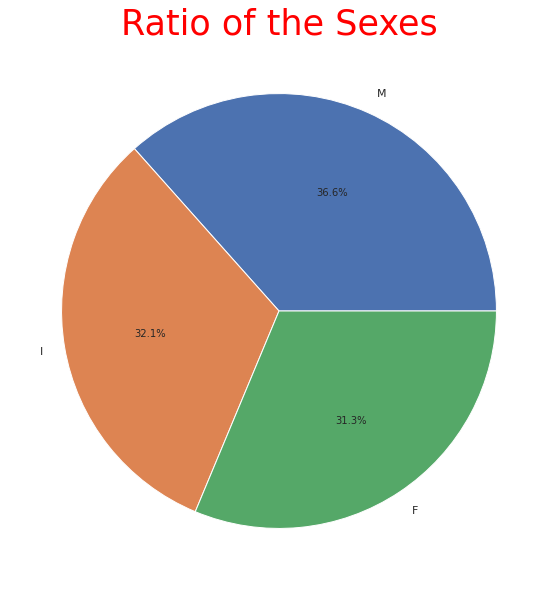

In [9]:
sex_quantity=dataset.Sex.value_counts()

plt.figure(figsize=(15,10))
plt.pie(x=sex_quantity, labels=sex_quantity.index, autopct='%1.1f%%')
plt.title('Ratio of the Sexes',color = 'red',fontsize = 35)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


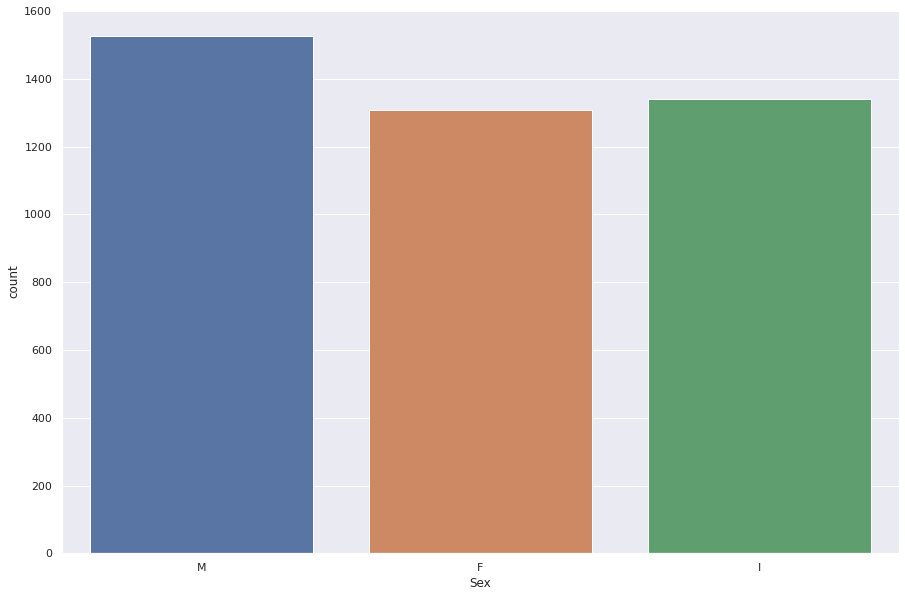

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(dataset['Sex'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


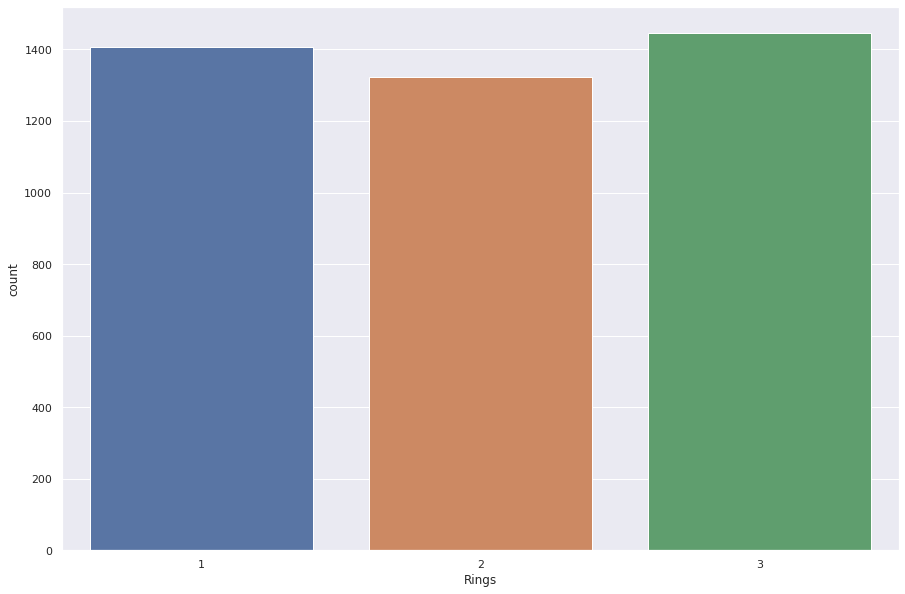

In [11]:
#Visualization Part
ring_data=dataset["Rings"]
ring_data=ring_data.sort_values()
plt.figure(figsize=(15,10))
sns.countplot(ring_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


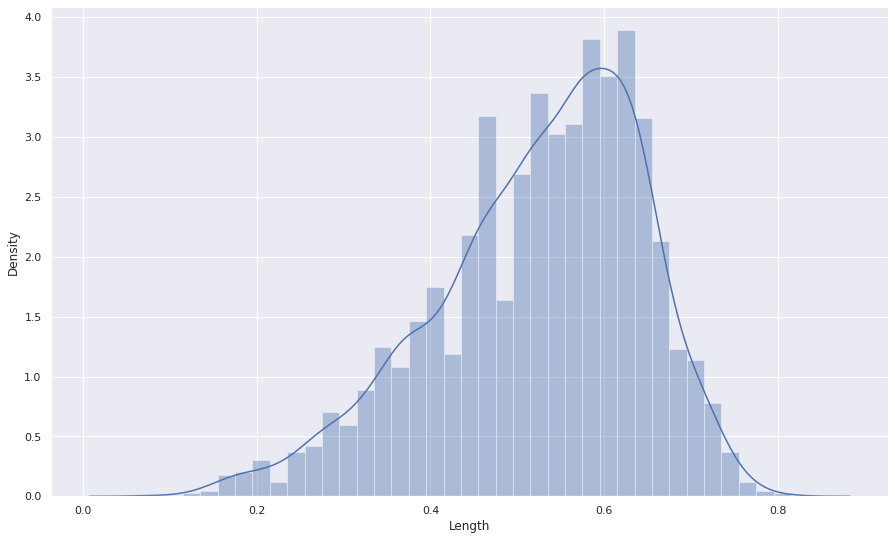

In [12]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['Length'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


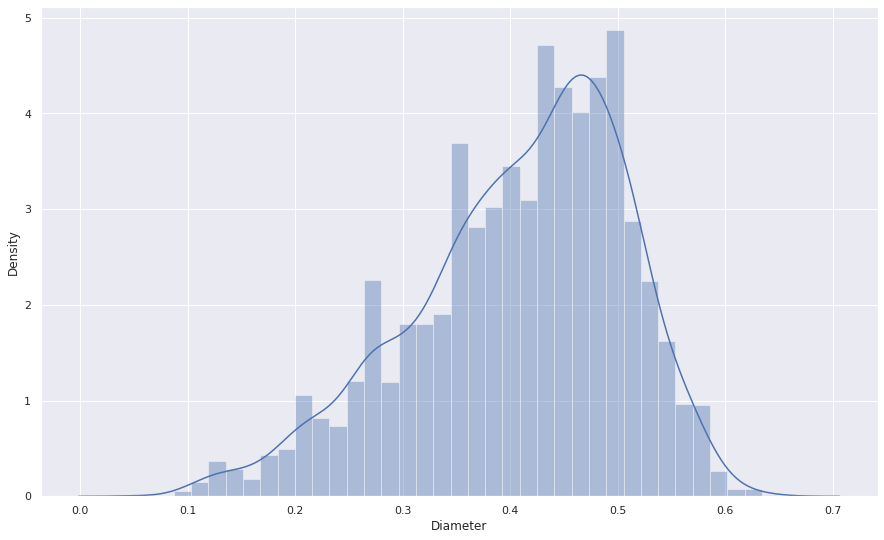

In [13]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['Diameter'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


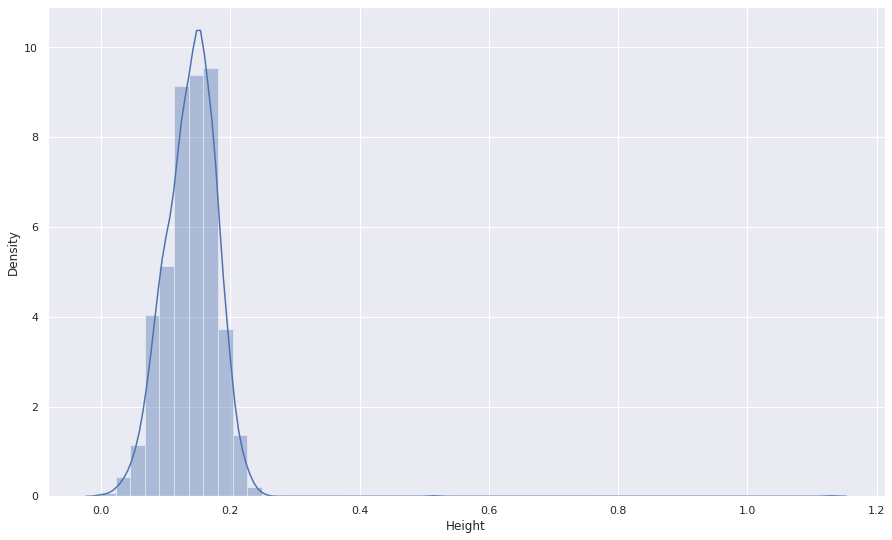

In [14]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['Height'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


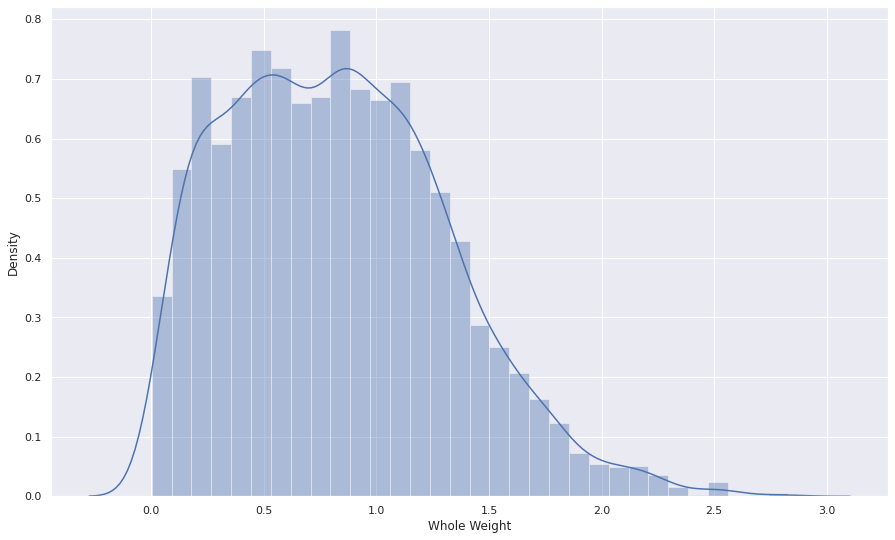

In [15]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['Whole Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


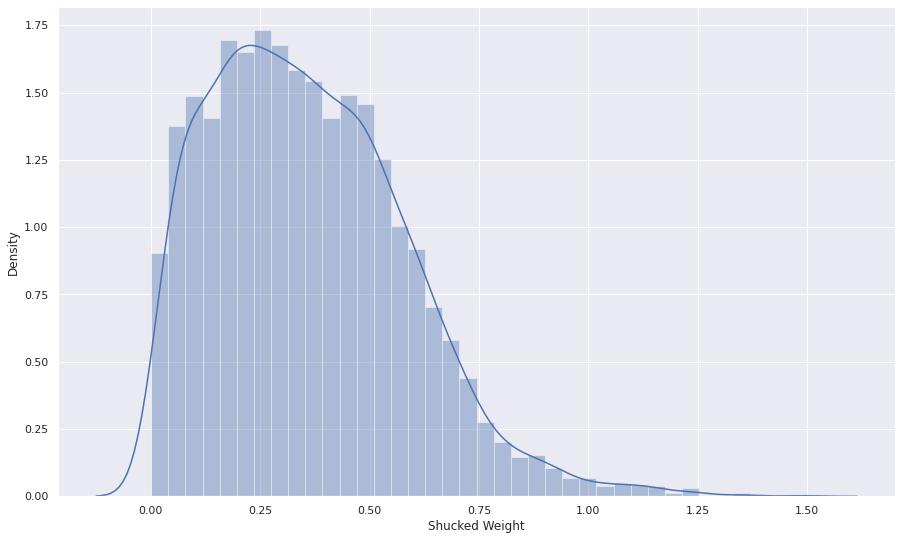

In [16]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['Shucked Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


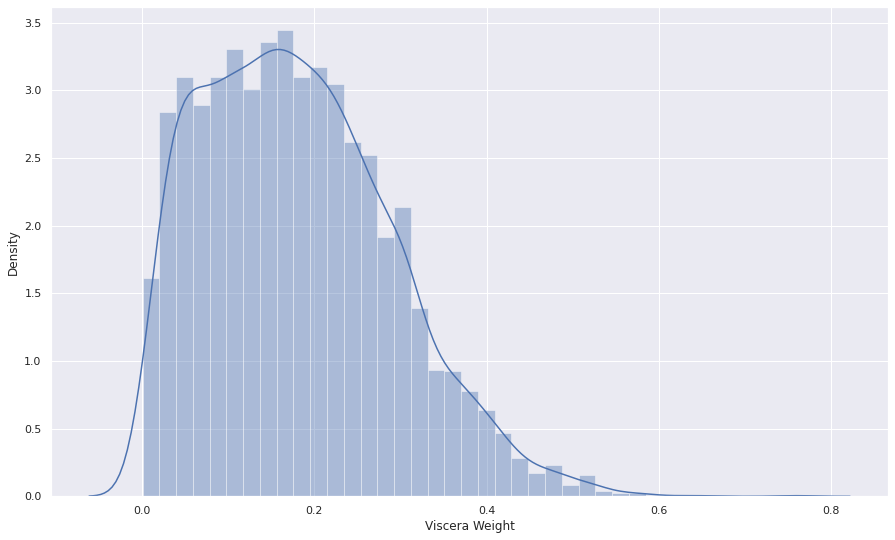

In [17]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['Viscera Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


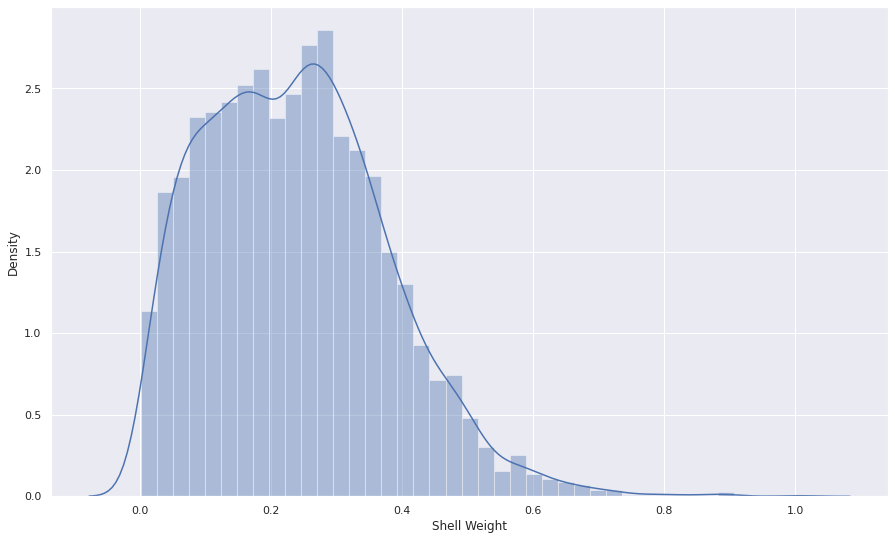

In [18]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['Shell Weight'])
plt.show()

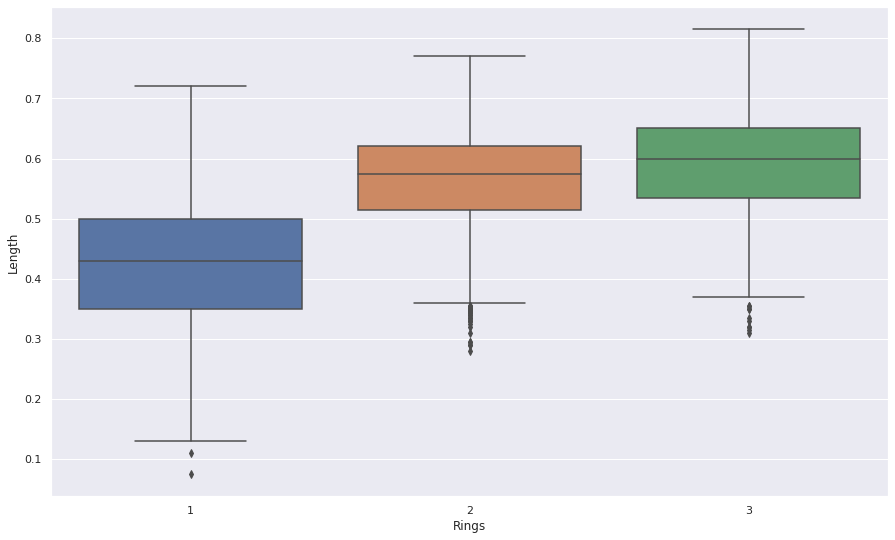

In [74]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Rings", y="Length", data=dataset)
plt.show()

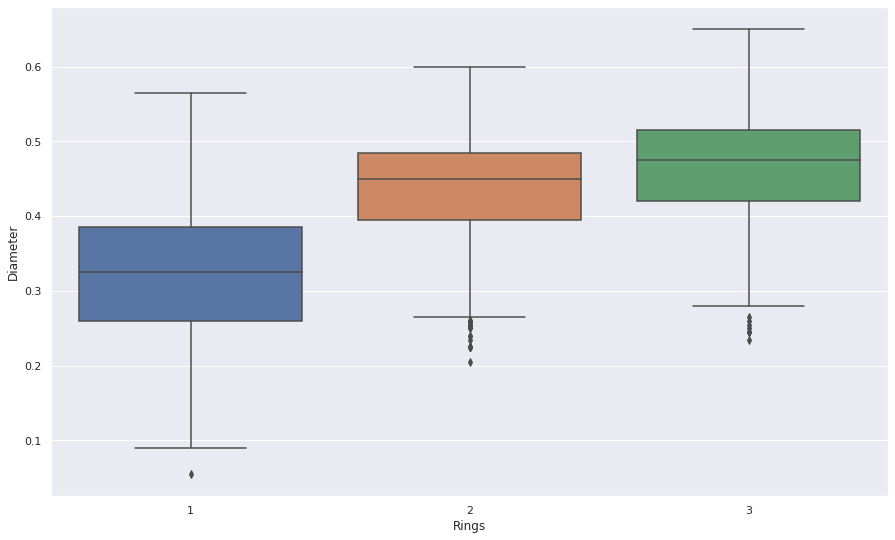

In [75]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Rings", y="Diameter", data=dataset)
plt.show()

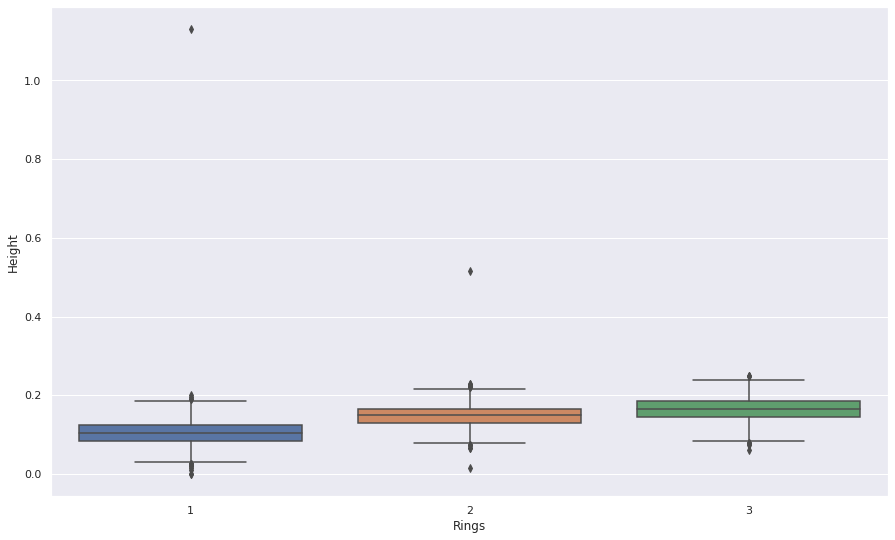

In [76]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Rings", y="Height", data=dataset)
plt.show()

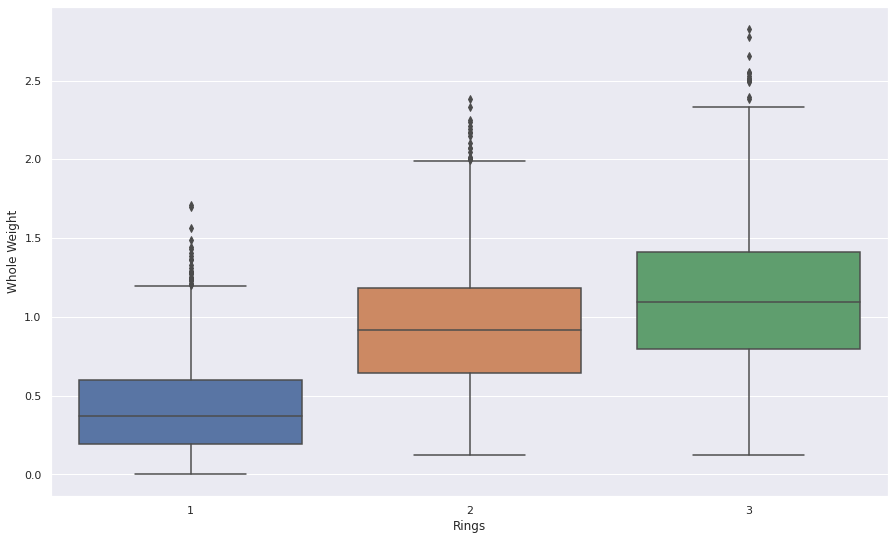

In [77]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Rings", y="Whole Weight", data=dataset)
plt.show()

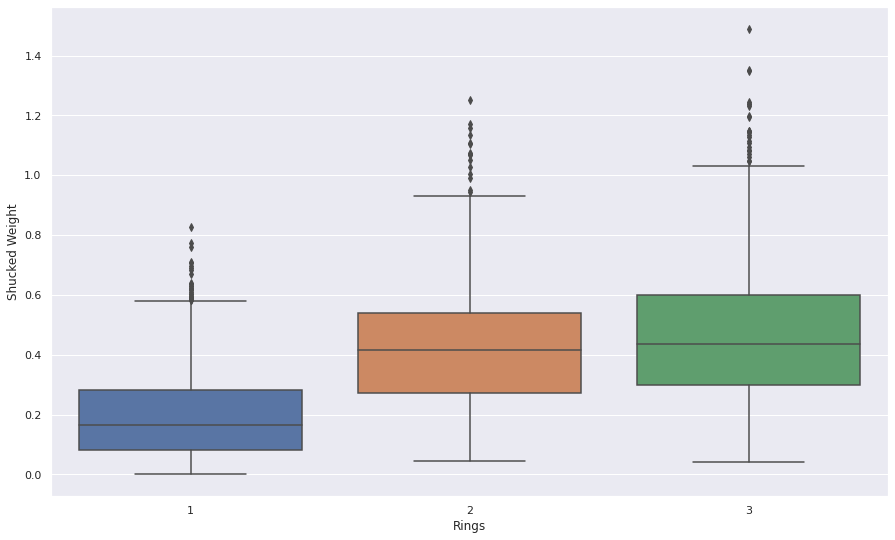

In [78]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Rings", y="Shucked Weight", data=dataset)
plt.show()

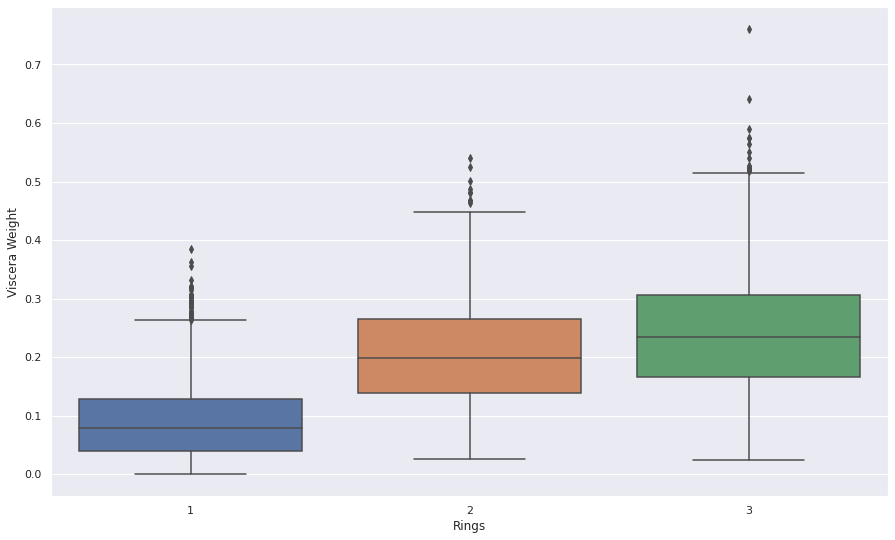

In [79]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Rings", y="Viscera Weight", data=dataset)
plt.show()

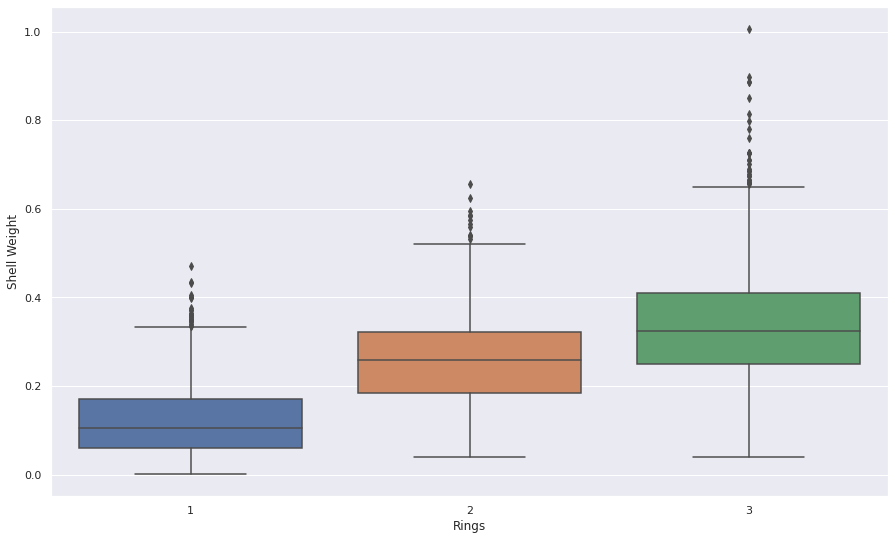

In [80]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Rings", y="Shell Weight", data=dataset)
plt.show()

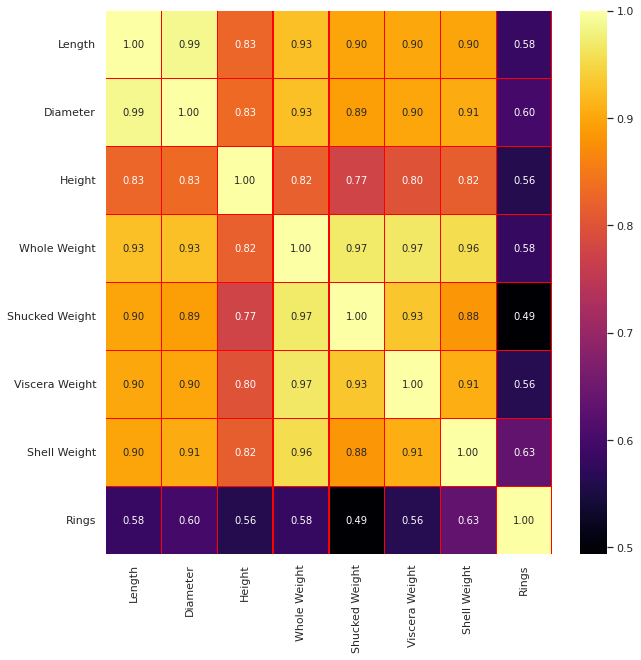

In [26]:
#Correlation Heatmap
corelation_matrix=dataset.corr()
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corelation_matrix, annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax,cmap='inferno')
plt.show()

In [27]:
import plotly.express as px
from plotly.offline import iplot
fig = px.scatter_3d(dataset, x='Length',
                    y='Whole Weight', 
                    z='Diameter',
                   color='Rings', 
       color_continuous_scale='icefire'
       )
iplot(fig)

# Part 2 Building Decision Tree

In [28]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

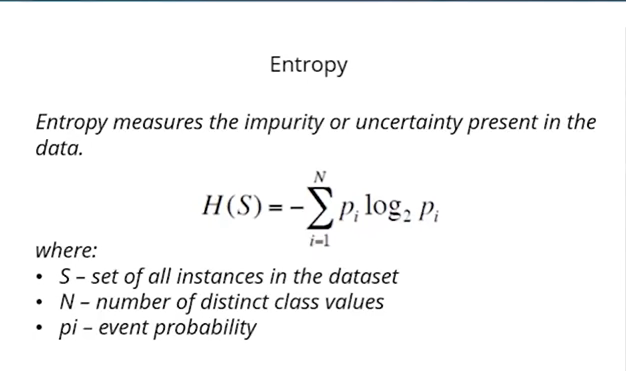

In [32]:
'''
Counter is a container that will hold the count of each of the elements present in the container. 
The counter is a sub-class available inside the dictionary class. '''
from collections import Counter 

def entropy(s):
    counts = np.bincount(s) #Getting Frequency of each element in numpy array
    percentages = counts / len(s) #Frequencies over total length of numpy array
    
    entropy = 0 #Initial value of entropy is 0 (Zero)
    for percantage in percentages:
        if percantage > 0:
            entropy += percantage * np.log2(percantage) #Log 2 is selected due to Binary Split
    return -entropy



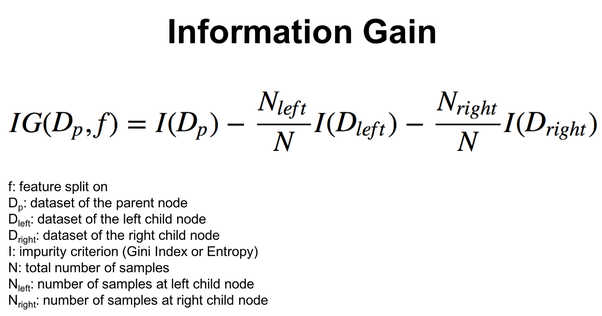

In [33]:
def information_gain(parent, left_child, right_child):
    num_left = len(left_child) / len(parent)
    num_right = len(right_child) / len(parent)
    
    gain = entropy(parent) - (num_left * entropy(left_child) + num_right * entropy(right_child))
    return gain

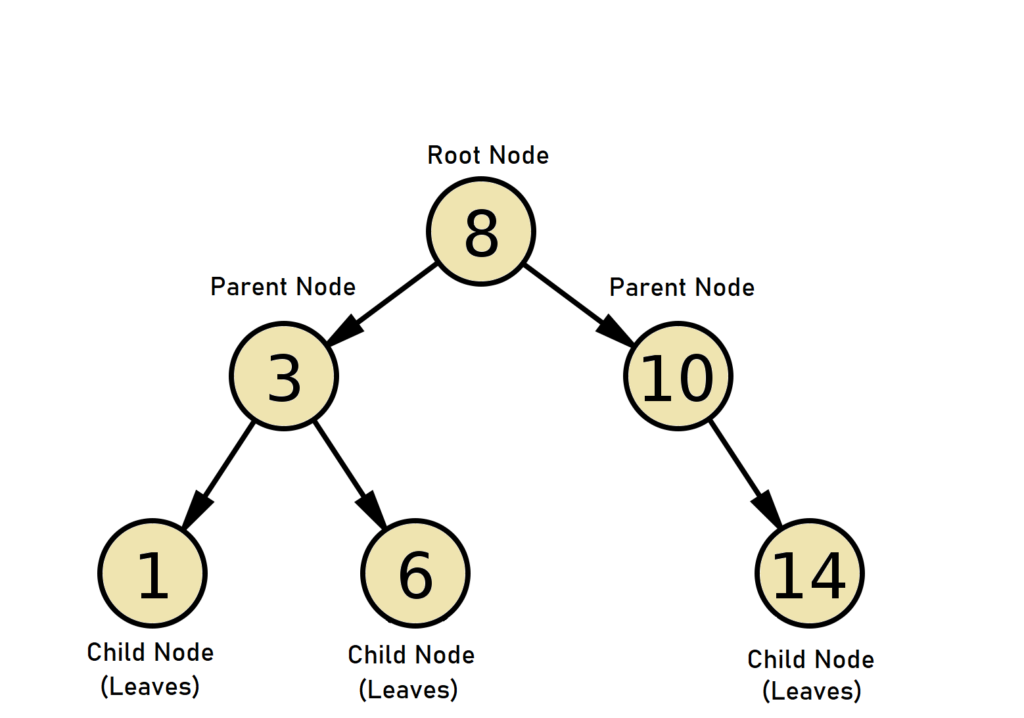

Node class that represents each node in Decision Tree

In [34]:
class Node: 

    def __init__(self, feature=None, threshold=None, left_child=None, right_child=None, gain=None, label=None, depth=None): #Constructor of Node class
        self.feature = feature #Index of feature in X array
        self.threshold = threshold #Threshold value
        self.left_child = left_child 
        self.right_child = right_child
        self.gain = gain 
        self.label = label #Only Leaf nodes have Label Value 
        self.depth=depth #Depth of Node
    def __repr__(self):
        if self.label is None:
          return 'Split Node--> '+ '  Depth: '+str(self.depth) +' Feature: '+str(self.feature)+ '  Column name: ' +dataset.columns[self.feature]+'   Threshold: '+str(self.threshold)
        else:
          return 'Leaf Node--> '+ '  Depth: '+str(self.depth)+ ' Label: '+str(self.label)

Pre Order Traversal function in order to traverse each node in Decision Tree

In [35]:
def PreorderTraversal(Node): #Traversal algorithm to traverse through the Decision Tree
        res = [] #List of Nodes in Decision Tree
        if Node:
            res.append([Node])
            res = res + PreorderTraversal(Node.left_child)
            res = res + PreorderTraversal(Node.right_child)
        return res

My Decision Tree class, which uses entropy for splitting

In [36]:
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=5): #Constructor of Decision Tree Class
        self.min_samples_split = min_samples_split #The minimum number of samples required to split an internal node:
        self.max_depth = max_depth #Max Depth of Decision tree
        self.root = None #Root Node of Decision Tree
        
    
    def _entropy(self,s): #Static Function for calculating Entropy for each Split
        #parameter s stands for list
        
        # Convert to integers to avoid runtime errors
        counts = np.bincount(np.array(s, dtype=np.int64))  #Getting Frequency of each element in numpy array
        # Probabilities of each class label
        percentages = counts / len(s) #Frequencies over total length of numpy array

        # Caclulate entropy
        entropy = 0 #Initial Value of Entropy is 0
        for percantage in percentages:
            if percantage > 0:
                entropy += percantage * np.log2(percantage)
        return -entropy #Returns negative float entropy value
    
    def _information_gain(self, parent, left_child, right_child): #Helper function, calculates information gain from a parent and two child nodes.
        
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)
        
        # One-liner which implements the previously discussed formula
        return self._entropy(parent) - (num_left * self._entropy(left_child) + num_right * self._entropy(right_child)) #Returns Float Information Gain
    
    def _best_split(self, X, y): # X: Features, y: Labels
        

        n_rows=len(X) #Number of rows in X
        n_cols=len(X[0]) #Number of columns in X 
        best_split = {} #Creating Empty Dictionary to store best_split
        best_info_gain = -1 #Initial best gain information is -1 because it is the worst value
        
        
        # For every dataset feature
        for column in range(n_cols):
            X_curr = X[:, column] #Current column of X
            # For every unique value of that feature
            for threshold in np.unique(X_curr):
              
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[column] <= threshold]) #df_left represents the values that are lower than or equal to threshold
                df_right = np.array([row for row in df if row[column] > threshold]) #df_right represents the values that are higher than threshold

                # Doing calculation if and only if there is data in both df subsets
                if len(df_left) > 0 and len(df_right) > 0:
                    # Obtain the value of the target variable for subsets
                    y = df[:, -1] #Getting labels of parent node
                    y_left = df_left[:, -1] #Getting labels of left child
                    y_right = df_right[:, -1] #Getting labels of right child

                    
                    gain = self._information_gain(y, y_left, y_right) #Calculating Information Gain
                    if gain > best_info_gain: #If current gain is higher than previous gain, save it into the best_split
                        best_split = {
                            'feature_index': column,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_info_gain = gain 
        return best_split #Returning Best Split
    
    def _build(self, X, y, depth=0):
        '''
        Helper recursive function, used to build a decision tree from the input data.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :param depth: current depth of a tree, used as a stopping criteria
        :return: Node
        '''
        n_rows=len(X) #Number of rows in X
        n_cols=len(X[0]) #Number of columns in X
        
        # Trying to see if the node should be a leaf node
        if n_rows >= self.min_samples_split and depth <= self.max_depth:
            # Getting the best split
            best = self._best_split(X, y)
            # If the split is not pure:
            if best['gain'] > 0:
                # Build a tree on the left side
                left = self._build(
                    X=best['df_left'][:, :-1], 
                    y=best['df_left'][:, -1], 
                    depth=depth + 1 #Incrementing depth
                )
                # Build a tree on the right side
                right = self._build(
                    X=best['df_right'][:, :-1], 
                    y=best['df_right'][:, -1], 
                    depth=depth + 1
                )
                return Node(
                    feature=best['feature_index'], 
                    threshold=best['threshold'], 
                    left_child=left, 
                    right_child=right, 
                    gain=best['gain'],
                    depth=depth
                )
        # Leaf node - value is the most common target value 
        return Node(
            label=Counter(y).most_common(1)[0][0],
            depth=depth
        )
    
    def fit(self, X, y):
        '''
        Function used to train a decision tree classifier model.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :return: None
        '''
        # Call a recursive function to build the tree
        self.root = self._build(X, y)
        
    def _single_predict(self, x, tree):
        '''
        Helper recursive function, used to predict a single instance (tree traversal).
        
        :param x: single observation
        :param tree: built tree
        :return: float, predicted class
        '''
        # Leaf node
        if tree.label != None:
            return tree.label
        feature_value = x[tree.feature]
        
        # Go to the left
        if feature_value <= tree.threshold:
            return self._single_predict(x=x, tree=tree.left_child)
        
        # Go to the right
        if feature_value > tree.threshold:
            return self._single_predict(x=x, tree=tree.right_child)
        
    def predict(self, X):
        #calling single_predict() for every X row
        return [self._single_predict(x, self.root) for x in X] #Returns numpy array that shows predicted labels
    def gather_rules(self): #This function traverses and shows every node of Decision Tree
      node_list=PreorderTraversal(self.root)
      for inner_list in node_list:
        for node in inner_list:
          if node.label is not None: #Leaf Node Case
            print('',node.depth * "\t","node=",str(node)," is a leaf node.")
          else: #Split Node Case
            print(node.depth * "\t","node=",str(node)," is a split node: ",
                "go to node ",str(node.left_child)," if (column name:",dataset.columns[node.feature], "<= ",str(node.threshold),
                "else to node",str(node.right_child),".")


In [37]:
mytree=DecisionTree()

In [38]:
mytree.fit(X_train.values,y_train.values)

In [ ]:
Example Decision Tree Rules:

In [39]:
mytree.gather_rules()

 node= Split Node-->   Depth: 0 Feature: 7  Column name: Shell Weight   Threshold: 0.1545  is a split node:  go to node  Split Node-->   Depth: 1 Feature: 7  Column name: Shell Weight   Threshold: 0.097  if (column name: Shell Weight <=  0.1545 else to node Split Node-->   Depth: 1 Feature: 7  Column name: Shell Weight   Threshold: 0.2925 .
	 node= Split Node-->   Depth: 1 Feature: 7  Column name: Shell Weight   Threshold: 0.097  is a split node:  go to node  Split Node-->   Depth: 2 Feature: 0  Column name: Sex   Threshold: I  if (column name: Shell Weight <=  0.097 else to node Split Node-->   Depth: 2 Feature: 5  Column name: Shucked Weight   Threshold: 0.232 .
		 node= Split Node-->   Depth: 2 Feature: 0  Column name: Sex   Threshold: I  is a split node:  go to node  Split Node-->   Depth: 3 Feature: 3  Column name: Height   Threshold: 0.095  if (column name: Sex <=  I else to node Split Node-->   Depth: 3 Feature: 4  Column name: Whole Weight   Threshold: 0.125 .
			 node= Split N

# Part 3 Decision Tree Prediction

In [40]:
y_pred = mytree.predict(X_test.values)

In [41]:
from sklearn import metrics

print('Accuracy:% ',(metrics.accuracy_score(y_test.values, y_pred)*100))

Accuracy:%  62.32057416267942


In [42]:
from sklearn.metrics import confusion_matrix #Confusion matrix function from scikit learn library
cf_part3=pd.DataFrame(confusion_matrix(y_test.values, y_pred), index=['True:1', 'True:2','True:3'], columns=['Pred:1', 'pred:2', 'pred:3']) #Confusion Matrix
cf_part3

,Pred:1,pred:2,pred:3
True:1,196,72,11
True:2,40,147,94
True:3,16,82,178


# Part 4 K-fold Cross Validation with my own Decision Tree

In [43]:
X=X.values #Converting X from pandas to Numpy From
y=y.values #Converting y from pandas to Numpy From

My own function that applies K-Fold Cross Validation and assess each DT Model

In [44]:
from sklearn.model_selection import KFold 
from sklearn import metrics
from sklearn.metrics import classification_report #Special library for getting classification report as a table


kf = KFold(n_splits=5,shuffle=True) #5 splits

kf.get_n_splits(X)


def assess_DT_Model(criterion,min_samples_split,max_depth):
    cf_list=[]
    fpr_tpr_list=[]
    report_list=[]
    steps=0

    model= DecisionTree(min_samples_split=min_samples_split,max_depth=max_depth) #Decision Tree Classifier with given criterion (Rest of the hyperparameters are default)


    for train_index, test_index in kf.split(X):
     
        X_train, X_test = X[train_index], X[test_index] #Training and test features
     
        y_train, y_test = y[train_index], y[test_index] #Training and test labels
        
     
        model.fit(X_train,y_train) #Fitting the model
     
        y_pred = model.predict(X_test) #Getting predicted labels
        report=classification_report(y_test, y_pred) #Preparing classification report
        
        conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['True:1', 'True:2','True:3'], columns=['Pred:1', 'pred:2', 'pred:3']) #COnfusion Matrix of each K-fold Step

        print("Decision Tree ","criterion: ",criterion," max_depth: ",max_depth," min_samples_split: ",min_samples_split,"\tStep ",steps,"\nConfusion Matrix:\n ",conf_matrix)
        
        
        
        
        report_list.append(('****************************************************\n'"Decision Tree "+"criterion: "+criterion+" max_depth:"+str(max_depth)+" min_samples_split:"+str(min_samples_split)+' Accuracy:% '+str((metrics.accuracy_score(y_test, y_pred)*100))+'\n'+str(report)))
        
        steps=steps+1


    for report in report_list:
        print(report)
    

    return model

In [45]:
assess_DT_Model("Entropy",2,5)

Decision Tree  criterion:  Entropy  max_depth:  5  min_samples_split:  2 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     197      72      11
True:2      34     173      67
True:3      16     112     154
Decision Tree  criterion:  Entropy  max_depth:  5  min_samples_split:  2 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     197      69      11
True:2      38     134      80
True:3      16     107     184
Decision Tree  criterion:  Entropy  max_depth:  5  min_samples_split:  2 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     173      79      20
True:2      38     142      76
True:3      17      87     203
Decision Tree  criterion:  Entropy  max_depth:  5  min_samples_split:  2 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     210      62      13
True:2      48     154      81
True:3      23      60     184
Decision Tree  criterion:  Entropy  max_depth:  5  min_samples_split:  2 	Step  4 
Confusion

# Part 5 Pruning Strategies

In [46]:
assess_DT_Model('entropy',5,2)

Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  5 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     196      35      25
True:2      89      62     128
True:3      29      34     238
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  5 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     213      58      19
True:2      52      97     117
True:3      19      59     202
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  5 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     238      32      16
True:2      54      83     115
True:3      24      47     226
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  5 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     236      44      23
True:2      48      86     128
True:3      37      38     195
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  5 	Step  4 
Confusion

In [47]:
assess_DT_Model('entropy',10,2)

Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  10 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     238      45       7
True:2      62     118      96
True:3      35      71     164
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  10 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     195      67      28
True:2      51      98      82
True:3      17      79     219
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  10 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     221      24      33
True:2      52      42     168
True:3      29      13     253
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  10 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     221      48      16
True:2      80      87     101
True:3      36      55     191
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  10 	Step  4 
Conf

In [48]:
assess_DT_Model('entropy',20,2)

Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  20 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     212      55      17
True:2      48     103     106
True:3      19      66     210
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  20 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     214      39      16
True:2      59      95     123
True:3      35      35     220
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  20 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     210      64      12
True:2      59     130      65
True:3      30     106     159
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  20 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     223      25      40
True:2      61      41     163
True:3      25      21     236
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  20 	Step  4 
Conf

In [49]:
assess_DT_Model('entropy',50,2)

Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  50 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     197      46      21
True:2      67      82     127
True:3      28      40     228
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  50 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     221      41      20
True:2      56      94     122
True:3      31      35     216
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  50 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     242      41      26
True:2      53      84     119
True:3      35      34     201
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  50 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     218      44      13
True:2      66      70     123
True:3      30      51     220
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  50 	Step  4 
Conf

In [50]:
assess_DT_Model('entropy',100,2)

Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  100 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     205      41      36
True:2      52      75     142
True:3      20      56     209
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  100 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     208      62      13
True:2      55     121      97
True:3      24      91     165
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  100 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     204      49      19
True:2      62      90     114
True:3      29      40     228
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  100 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     240      10      42
True:2      59      49     142
True:3      25      20     248
Decision Tree  criterion:  entropy  max_depth:  2  min_samples_split:  100 	Step  4 

In [51]:
assess_DT_Model('entropy',5,3)

Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  5 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     207      48      14
True:2      57     161      52
True:3      12     117     168
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  5 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     221      59      12
True:2      49     147      69
True:3      21     116     142
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  5 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     199      76      11
True:2      50     131      90
True:3      23      92     163
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  5 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     208      70      13
True:2      50     164      51
True:3      20     112     147
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  5 	Step  4 
Confusion

In [52]:
assess_DT_Model('entropy',10,3)

Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  10 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     167      94      13
True:2      36     137     117
True:3      14      67     191
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  10 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     225      42      21
True:2      62      88      91
True:3      28      60     219
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  10 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     210      48      19
True:2      69     154      74
True:3      25      93     143
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  10 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     218      51      11
True:2      39     133      68
True:3      27     117     171
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  10 	Step  4 
Conf

In [53]:
assess_DT_Model('entropy',20,3)

Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  20 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     204      63      17
True:2      52     168      63
True:3      17     104     148
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  20 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     222      47      21
True:2      48      89     116
True:3      14      49     230
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  20 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     211      57      18
True:2      52     165      54
True:3      20     110     148
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  20 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     216      57      12
True:2      51     121      75
True:3      34     114     155
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  20 	Step  4 
Conf

In [54]:
assess_DT_Model('entropy',50,3)

Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  50 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     187      57      15
True:2      49     109     128
True:3      19      53     219
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  50 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     201      66      20
True:2      39     111     105
True:3      11      96     187
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  50 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     217      36      17
True:2      66     135      62
True:3      33     105     164
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  50 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     236      63       7
True:2      51     151      62
True:3      28      98     139
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  50 	Step  4 
Conf

In [55]:
assess_DT_Model('entropy',100,3)

Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  100 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     221      47      17
True:2      66     110      87
True:3      27      72     189
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  100 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     197      56      19
True:2      47     165      50
True:3      19     131     152
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  100 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     219      39      26
True:2      65      68     143
True:3      22      40     213
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  100 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     234      34      12
True:2      76     141      54
True:3      26     103     155
Decision Tree  criterion:  entropy  max_depth:  3  min_samples_split:  100 	Step  4 

In [56]:
assess_DT_Model('entropy',5,5)

Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  5 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     208      44      25
True:2      69     112     101
True:3      25      72     180
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  5 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     211      62      12
True:2      42     128      70
True:3      23     111     177
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  5 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     220      53      23
True:2      53     107     101
True:3      17      74     187
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  5 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     194      65      19
True:2      41     157      72
True:3      15     112     160
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  5 	Step  4 
Confusion

In [57]:
assess_DT_Model('entropy',10,5)

Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  10 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     211      49      15
True:2      45     138      76
True:3      24      99     179
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  10 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     188      43      22
True:2      58     104     127
True:3      35      54     205
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  10 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     196      83      27
True:2      49     124      70
True:3      11      90     185
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  10 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     207      53      13
True:2      58     147      68
True:3      20     104     165
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  10 	Step  4 
Conf

In [58]:
assess_DT_Model('entropy',20,5)

Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  20 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     202      61       8
True:2      50     156      61
True:3      19     104     175
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  20 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     209      54      12
True:2      57     130      94
True:3      21      74     185
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  20 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     231      46      10
True:2      70     113      63
True:3      27     103     172
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  20 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     236      55      11
True:2      53     148      49
True:3      21     105     157
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  20 	Step  4 
Conf

In [59]:
assess_DT_Model('entropy',50,5)

Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  50 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     205      62      11
True:2      53     120      79
True:3      23     107     176
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  50 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     199      55      18
True:2      48     117     115
True:3      19      50     215
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  50 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     202      61      15
True:2      54     140      80
True:3      21      78     184
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  50 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     208      68      18
True:2      35     125     100
True:3      15      72     194
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  50 	Step  4 
Conf

In [60]:
assess_DT_Model('entropy',100,5)

Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  100 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     213      49      26
True:2      56     107     100
True:3      34      60     191
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  100 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     224      48      20
True:2      52     125      70
True:3      24      84     189
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  100 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     233      38      22
True:2      76     100      85
True:3      33      68     180
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  100 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     197      54      21
True:2      57     135      69
True:3      17     121     164
Decision Tree  criterion:  entropy  max_depth:  5  min_samples_split:  100 	Step  4 

In [61]:
assess_DT_Model('entropy',5,10)

Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  5 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     199      50      21
True:2      74     128      72
True:3      25     112     155
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  5 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     201      61      24
True:2      49     129      73
True:3      30     110     159
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  5 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     207      64      25
True:2      48     121      89
True:3      15      81     185
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  5 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     198      52      24
True:2      59     133      86
True:3      22      89     172
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  5 	Step  4 
Conf

In [62]:
assess_DT_Model('entropy',10,10)

Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  10 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     194      63      14
True:2      61     154      70
True:3      21     100     159
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  10 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     208      55      24
True:2      52     104      99
True:3      21     105     168
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  10 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     200      73      23
True:2      35     145      67
True:3      20     119     153
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  10 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     178      67      25
True:2      60     109     106
True:3      19      81     190
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  10 	Step  4 

In [63]:
assess_DT_Model('entropy',20,10)

Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  20 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     194      47      15
True:2      58     125      93
True:3      25      92     187
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  20 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     215      65      17
True:2      65     124      75
True:3      23      91     161
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  20 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     202      61      18
True:2      67     115      82
True:3      22     100     168
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  20 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     192      70      14
True:2      57     130      74
True:3      18     117     163
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  20 	Step  4 

In [64]:
assess_DT_Model('entropy',50,10)

Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  50 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     208      50      10
True:2      65     128      91
True:3      27      76     181
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  50 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     218      44      12
True:2      52     146      60
True:3      12     125     167
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  50 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     202      59      24
True:2      66     111      88
True:3      23      70     192
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  50 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     212      60      22
True:2      56     132      67
True:3      25      97     164
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  50 	Step  4 

In [65]:
assess_DT_Model('entropy',100,10)

Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  100 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     206      55      20
True:2      47     120      95
True:3      27      76     190
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  100 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     198      49      19
True:2      55     111     107
True:3      18      78     201
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  100 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     207      44      25
True:2      50     115     102
True:3      22      75     195
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  100 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     217      52       9
True:2      67     130      71
True:3      21     105     163
Decision Tree  criterion:  entropy  max_depth:  10  min_samples_split:  100 	Ste

In [66]:
assess_DT_Model('entropy',5,20)

Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  5 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     173      74      33
True:2      53     106      91
True:3      28     121     157
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  5 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     231      64      22
True:2      56     109      83
True:3      25      65     181
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  5 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     182      49      32
True:2      57     124     102
True:3      22      92     175
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  5 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     181      57      39
True:2      61     115      82
True:3      29     102     169
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  5 	Step  4 
Conf

In [67]:
assess_DT_Model('entropy',10,20)

Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  10 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     165      79      20
True:2      56     123      91
True:3      25      94     183
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  10 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     198      47      27
True:2      66     126      89
True:3      27      89     167
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  10 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     210      66      27
True:2      45     110      80
True:3      19      94     184
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  10 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     188      68      19
True:2      60     115     106
True:3      27      80     172
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  10 	Step  4 

In [68]:
assess_DT_Model('entropy',20,20)

Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  20 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     208      49      18
True:2      62      96      94
True:3      28      76     205
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  20 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     184      65      22
True:2      48     143      75
True:3      27      99     173
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  20 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     204      54      24
True:2      60     110      99
True:3      25      91     168
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  20 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     192      74      27
True:2      57     114      96
True:3      16      85     174
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  20 	Step  4 

In [69]:
assess_DT_Model('entropy',50,20)

Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  50 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     199      66      14
True:2      56     128      93
True:3      17      75     188
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  50 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     192      77      27
True:2      50     113      96
True:3      20      78     183
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  50 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     229      54      19
True:2      44     119      94
True:3      20      66     190
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  50 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     189      56      20
True:2      61     105      99
True:3      15      89     201
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  50 	Step  4 

In [70]:
assess_DT_Model('entropy',100,20)

Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  100 	Step  0 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     227      32      21
True:2      79     107      99
True:3      31      54     186
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  100 	Step  1 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     221      42      33
True:2      46     105     108
True:3      11      67     203
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  100 	Step  2 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     221      45      19
True:2      52     117      86
True:3      29      76     190
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  100 	Step  3 
Confusion Matrix:
          Pred:1  pred:2  pred:3
True:1     191      54      13
True:2      49     136      77
True:3      28     114     173
Decision Tree  criterion:  entropy  max_depth:  20  min_samples_split:  100 	Ste

The best model is the Decision Tree with max_depth:2 and min_samples_split:50 because it has 62% mean K-Fold Accuracy(Highest one).

# Part 6 Building Random Forest Algorithm

In [71]:
import random

def build_rdf(X_train, y_train, number_of_trees, max_depth,min_samples_split):
  column_list=list(range(len(X[0])))
  min_samples_split_list=[5,10,20,50,100]
  max_depth_list=[2,3,5,10,20]

  tree_list=list()
  for i in range(number_of_trees):
    random.shuffle(column_list)
    random.shuffle(min_samples_split_list)
    random.shuffle(max_depth_list)
    my_tree=DecisionTree(min_samples_split_list[0],max_depth_list[0])
    tree_list.append(my_tree.fit(X_train[[column_list[0],column_list[1],column_list[2],column_list[3]]],y_train))
  return tree_list




In [72]:
def predict_rdf(tree_list,X_test):
  prediction_list=list()
  for tree in tree_list:
    y_pred=tree.predict(X_test)
    prediction_list.append(y_pred)
  majority_vote_list=list()
  most_frequent_vote=list()
  for i in range (len(prediction_list[0])):
    for each_tree_prediction in prediction_list:
      most_frequent_vote.append(each_tree_prediction[i])
    most_frequent_element=max(most_frequent_vote, key = most_frequent_vote.count)
    majority_vote_list.append(most_frequent_element)
    most_frequent_vote.clear()
  return majority_vote_list

In [73]:
rdf1=build_rdf(X,y,20,2,2)
y_pred=predict_rdf(rdf1,X)

AttributeError: ignored

Actually i implemented random forest algorithm but i could't recognize the problem. Yet, i want it to stay in my notebook to show.